# Importing the libraries

In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


**From displaying all features of dataset**

In [13]:
pd.pandas.set_option('display.max_columns', None)

In [14]:

# Reading Dataset:
dataset = pd.read_csv("Kindey_data.csv")
# Top 5 records:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd



**Data Set Information**

We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class

**Attribute Information:**

We use 24 + class = 25 ( 11 numeric ,14 nominal)

Age(numerical) age in years

Blood Pressure(numerical) bp in mm/Hg

Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)

Albumin(nominal) al - (0,1,2,3,4,5)

Sugar(nominal) su - (0,1,2,3,4,5)

Red Blood Cells(nominal) rbc - (normal,abnormal)

Pus Cell (nominal) pc - (normal,abnormal)

Pus Cell clumps(nominal) pcc - (present,notpresent)

Bacteria(nominal) ba - (present,notpresent)

Blood Glucose Random(numerical) bgr in mgs/dl

Blood Urea(numerical) bu in mgs/dl

Serum Creatinine(numerical) sc in mgs/dl

Sodium(numerical) sod in mEq/L

Potassium(numerical) pot in mEq/L

Hemoglobin(numerical) hemo in gms

Packed Cell Volume(numerical)

White Blood Cell Count(numerical) wc in cells/cumm

Red Blood Cell Count(numerical) rc in millions/cmm

Hypertension(nominal) htn - (yes,no)

Diabetes Mellitus(nominal) dm - (yes,no)

Coronary Artery Disease(nominal) cad - (yes,no)

Appetite(nominal) appet - (good,poor)

Pedal Edema(nominal) pe - (yes,no)

Anemia(nominal) ane - (yes,no)

Class (nominal) class - (ckd,notckd)

In [15]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [16]:
# Shape of dataset:
dataset.shape

(400, 25)

In [17]:

# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [18]:


# Description:
dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [19]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [20]:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

**Replacing Categorical values with numbers:**


**1. rbc**

In [21]:
dataset['rbc'].value_counts()


rbc
normal      201
abnormal     47
Name: count, dtype: int64

In [22]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\1225738230.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


**2. pc**

In [23]:
dataset['pc'].value_counts()


pc
normal      259
abnormal     76
Name: count, dtype: int64

In [24]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\659499331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


**3. pcc**

In [25]:
dataset['pcc'].value_counts()


pcc
notpresent    354
present        42
Name: count, dtype: int64

In [26]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\3284570427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


**4. ba**

In [27]:
dataset['ba'].value_counts()


ba
notpresent    374
present        22
Name: count, dtype: int64

In [28]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\3924475423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


**5. htn**

In [29]:
dataset['htn'].value_counts()


htn
no     251
yes    147
Name: count, dtype: int64

In [30]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\4273388747.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})


**6. dm**

In [31]:
dataset['dm'].value_counts()


dm
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

In [32]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})


In [33]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\3886047398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


**7. cad**

In [34]:
dataset['cad'].value_counts()


cad
no      362
yes      34
\tno      2
Name: count, dtype: int64

In [35]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})


In [36]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\1046343113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


**8. appet**

In [37]:
dataset['appet'].unique()


array(['good', 'poor', nan], dtype=object)

In [38]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\1559130877.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


**9. pe**

In [39]:
dataset['pe'].value_counts()


pe
no     323
yes     76
Name: count, dtype: int64

In [40]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\2450649097.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


**10. ane**

In [41]:
dataset['ane'].value_counts()


ane
no     339
yes     60
Name: count, dtype: int64

In [42]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\972619848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


**11. classification**

In [43]:
dataset['classification'].value_counts()


classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [44]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})


In [45]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]


In [46]:
dataset.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [47]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

**Converting Object values into Numeric values:**

In [48]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [49]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [50]:
# Description:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Handling Null Values:**

There is Outliers present in our dataset so We fill NaN values with Median.

In [52]:
dataset.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [53]:

features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']


In [54]:
features = dataset.select_dtypes(include='number').columns

for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [55]:
dataset.isnull().any().sum()


np.int64(0)

**Heatmap**

C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\4102818903.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dataset = dataset.apply(pd.to_numeric, errors='ignore')


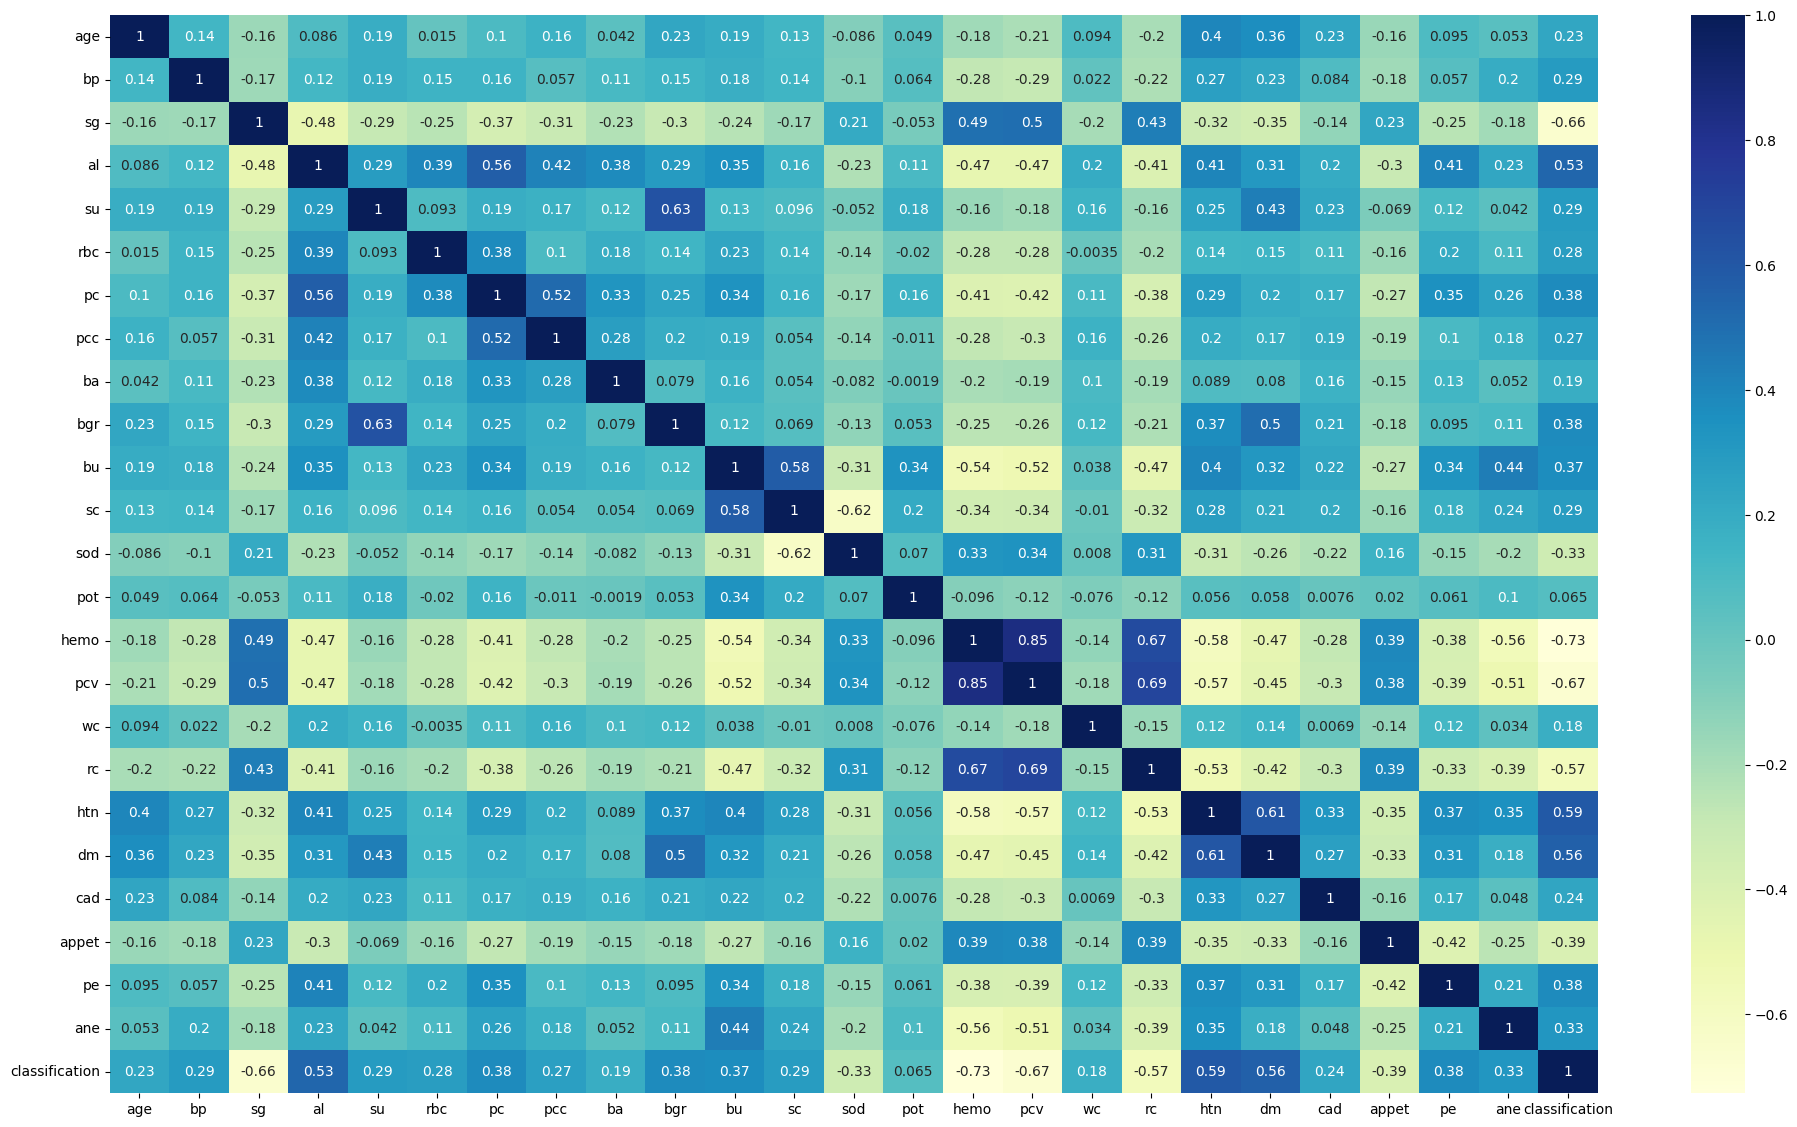

In [56]:
# Replace '?' or '\t?' with NaN
dataset = dataset.replace(['?', '\t?'], pd.NA)

# Convert all columns to numeric where possible
dataset = dataset.apply(pd.to_numeric, errors='ignore')

# Select only numeric columns
numeric_data = dataset.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(24, 14))
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

* We clearly see that 'pcv' and 'hemo' feature has 85% multicollinearity
* So we remove one of the feature. i.e pcv





In [57]:
dataset.drop('pcv', axis=1, inplace=True)


In [58]:
dataset.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: ylabel='count'>

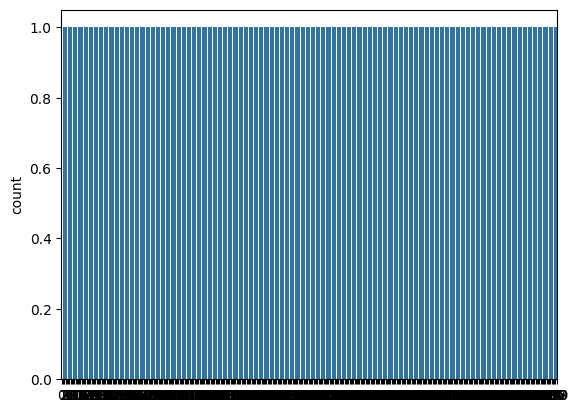

In [59]:
# Target feature:
sns.countplot(dataset['classification'])

In [60]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [61]:
X.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


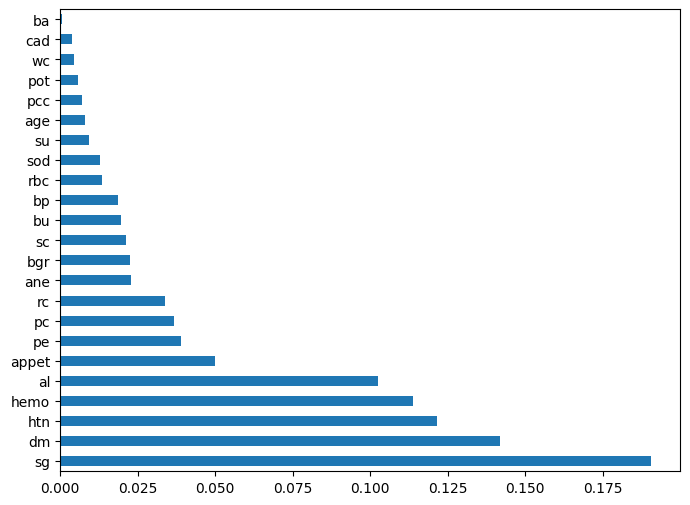

In [62]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()



*   We take top 8 feature only.





In [63]:
ranked_features.nlargest(8).index


Index(['sg', 'dm', 'htn', 'hemo', 'al', 'appet', 'pe', 'pc'], dtype='object')

In [64]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [65]:
X.tail()


,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [66]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [67]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [68]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


# Random Forest Algorithm

In [69]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [70]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [71]:

# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('RF')

Accuracy: 1.0
[[58  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# AdaBoostClassifier


In [72]:

# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('ADB')

Accuracy: 0.9666666666666667
[[55  3]
 [ 1 61]]


# GradientBoosting

In [73]:

# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('GB')

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



# Logistic Regression


In [74]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
LogisticRegression=LogisticRegression.fit(X_train,y_train)

# Predictions:
y_pred = LogisticRegression.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('LR')

Accuracy: 0.925
[[54  4]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.93      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



# Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB()
GaussianNB=GaussianNB.fit(X_train,y_train)

# Predictions:
y_pred = GaussianNB.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('NB')


Accuracy: 0.95
[[58  0]
 [ 6 56]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.90      0.95        62

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



# KNN


In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn=knn.fit(X_train, y_train)

# Predictions:
y_pred = knn.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('KNN')

Accuracy: 0.9333333333333333
[[55  3]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.95      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



# Support Vector Machine

In [77]:
from sklearn.svm import SVC
svm= SVC(kernel = 'linear', random_state = 0)
svm=svm.fit(X_train, y_train)

# Predictions:
y_pred = svm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('SVM')

Accuracy: 0.9416666666666667
[[55  3]
 [ 4 58]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.95      0.94      0.94        62

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



# Kernal SVM

In [78]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm=ksvm.fit(X_train, y_train)

# Predictions:
y_pred = ksvm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('kSVM')

Accuracy: 0.9
[[51  7]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.89      0.92      0.90        62

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



# Decision Tree

In [79]:
from sklearn import tree
tree=tree.DecisionTreeClassifier()
dtree=tree.fit(X_train,y_train)

# Predictions:
y_pred = dtree.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('DB')


Accuracy: 0.9916666666666667
[[58  0]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.98      0.99        62

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



# Accuracy Comparison

C:\Users\Sai durga prasad\AppData\Local\Temp\ipykernel_12312\2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

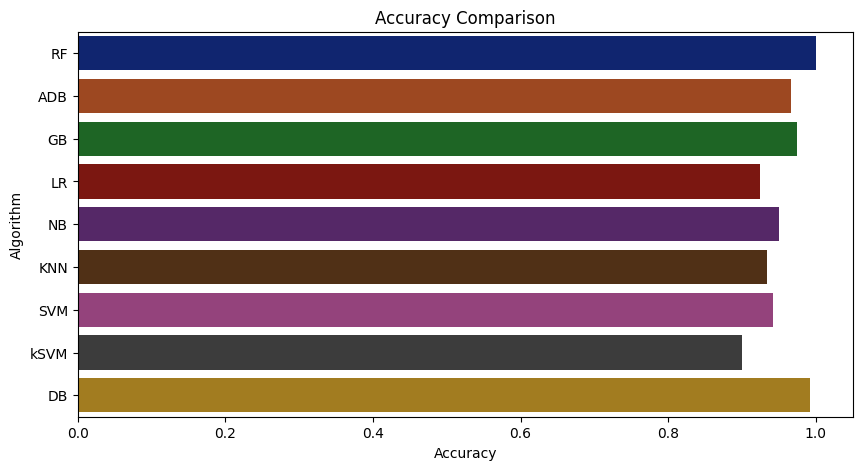

In [80]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')